<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

### 1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла.

In [2]:
hh_base = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')

# РАСЧЕТЫ ДЛЯ ОТВЕТОВ НА КОНТРОЛЬНЫЕ ВОПРОСЫ:
# Задание 2.1
# Чему равна размерность таблицы? Введите её в виде кортежа (число строк, число столбцов).
print(f'Размерность таблицы данных: {hh_base.shape}')

Размерность таблицы данных: (44744, 12)


### 2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
print(hh_base.head())

# РАСЧЕТЫ ДЛЯ ОТВЕТОВ НА КОНТРОЛЬНЫЕ ВОПРОСЫ:
# Задание 2.2
# В каком формате представлен порядок слов в признаке «Пол, возраст»?
print(f'\nНесколько примеров данных из столбца «Пол, возраст»:\n{hh_base["Пол, возраст"].iloc[25:28]}')

                                   Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...  

### 3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

### 4. Обратите внимание на информацию о числе непустых значений.

In [4]:
print(hh_base.info())

# РАСЧЕТЫ ДЛЯ ОТВЕТОВ НА КОНТРОЛЬНЫЕ ВОПРОСЫ:
# Задание 2.3
# Какой тип данных имеют все столбцы?
print(f'\nТипы данных столбцов: {hh_base.dtypes.value_counts()}')

# Задание 2.4
# Выберите все признаки, в которых есть пропуски в данных
print(f'\nСтолбцы с явными пропусками данных:\n{hh_base.isnull().sum()[hh_base.isnull().sum() > 0]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

### 5. Выведите основную статистическую информацию о столбцах.


In [5]:
print(hh_base.describe())

# РАСЧЕТЫ ДЛЯ ОТВЕТОВ НА КОНТРОЛЬНЫЕ ВОПРОСЫ:
# Задание 2.5
# Сколько уникальных значений содержится в столбце «Опыт работы»?
print(f'\nКоличество уникальных значений в столбце «Опыт работы»: {hh_base["Опыт работы"].nunique()}')

# Задание 2.6
# Какая из искомых должностей самая распространённая?
print(f'\nСамая распространенная искомая должность: {[*(hh_base["Ищет работу на должность:"].mode())]}')

                                         Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
cou

# Преобразование данных

### 1. Начнем с простого - с признака **"Образование и ВУЗ"**.
Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000 Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [6]:
# удостоверимся, что все комбинации первых двух слов столбца 'Образование и ВУЗ' соответствуют необходимым категориям:
levels_data = set(hh_base['Образование и ВУЗ'].apply(lambda x: re.match(r'\w+\s\w+', x).group()))
print(f'Наборы первых двух слов в данных: {levels_data}')


# на основе полученного набора можно создать функцию преобразования столбца:
def get_education_level(data_string):
    """Extracting the "Education" level from a string
       Args:
           data_string (str): Free form data string
       Returns:
           str: The level of education
       """
    levels_dict = {'Высшее образование': 'высшее', 'Неоконченное высшее': 'неоконченное высшее',
                   'Среднее специальное': 'среднее специальное', 'Среднее образование': 'среднее'}

    return levels_dict.get(re.match(r'\w+\s\w+', data_string).group())


# создадим новый столбец с категорией "Образование":
hh_base['Образование'] = hh_base['Образование и ВУЗ'].apply(get_education_level).astype('category')

# проверим получившийся столбец, а затем удалим исходный:
print('\nКоличество резюме по категориям образования:\n', hh_base['Образование'].value_counts())
hh_base = hh_base.drop('Образование и ВУЗ', axis=1)

# РАСЧЕТЫ ДЛЯ ОТВЕТОВ НА КОНТРОЛЬНЫЕ ВОПРОСЫ:
# Задание 3.1
# Сколько соискателей имеет средний уровень образования (школьное образование)?
print(f'\nСоискатели со школьным образованием: {hh_base[hh_base["Образование"] == "среднее"]["Образование"].count()}')

Наборы первых двух слов в данных: {'Неоконченное высшее', 'Среднее специальное', 'Среднее образование', 'Высшее образование'}

Количество резюме по категориям образования:
 высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: Образование, dtype: int64

Соискатели со школьным образованием: 559


### 2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**.
Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [7]:
# удостоверимся, что все данные содержат признак "Мужчина / Женщина" в первом слове:
gender_data = set(hh_base['Пол, возраст'].apply(lambda x: re.match(r'\w+', x).group()))
print(f'Набор первых слов в данных: {gender_data}')

# теперь понятно, что для формирования категории достаточно первой буквы данных:
hh_base['Пол'] = hh_base['Пол, возраст'].str[0].astype('category')

# формируем столбец с возрастом:
hh_base['Возраст'] = hh_base['Пол, возраст'].apply(lambda x: x.split(' , ')[1].split()[0]).astype('int8')

# проверим получившиеся столбцы и удалим исходный:
print('\nКоличество резюме по гендерному признаку:\n', hh_base['Пол'].value_counts())
print('\nСтатистические параметры признака "Возраст":\n', hh_base['Возраст'].describe())
hh_base = hh_base.drop('Пол, возраст', axis=1)

# РАСЧЕТЫ ДЛЯ ОТВЕТОВ НА КОНТРОЛЬНЫЕ ВОПРОСЫ:
# Задание 3.2
# Сколько процентов женских резюме представлено в наших данных? Ответ округлите до сотых.
proportion_of_women = round(hh_base[hh_base['Пол'] == 'Ж']['Пол'].count() / hh_base['Пол'].count() * 100, 2)
print(f'\nПроцент женских резюме: {proportion_of_women}')

# Чему равен средний возраст соискателей? Ответ округлите до десятых.
mean_age = round(hh_base['Возраст'].mean(), 1)
print(f'\nСредний возраст соискателей: {mean_age}')

Набор первых слов в данных: {'Мужчина', 'Женщина'}

Количество резюме по гендерному признаку:
 М    36211
Ж     8533
Name: Пол, dtype: int64

Статистические параметры признака "Возраст":
 count    44744.000000
mean        32.196741
std          7.929800
min         14.000000
25%         27.000000
50%         31.000000
75%         36.000000
max        100.000000
Name: Возраст, dtype: float64

Процент женских резюме: 19.07

Средний возраст соискателей: 32.2


### 3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**.

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [8]:
# проверим все комбинации первых слов столбца 'Опыт работы', исключив NaN значения:
experience_data = set(hh_base[hh_base['Опыт работы'].notnull()]['Опыт работы']
                      .apply(lambda x: re.match(r'\w+\s\w+', x).group()))
print(f'\nНаборы первых двух слов в данных: {experience_data}')

# теперь ясно, что после деления строки пробелами, информация об опыте будет содержаться в элементах, начиная с 3-го:
# создаем функцию преобразования столбца:
def get_experience_months(data_string):
    """Getting a value Work experience in months
       Args:
           data_string (str): A string of data in a partially defined format
       Returns:
           int: Number of months
       """
    if data_string is np.nan or data_string == 'Не указано':
        return np.nan

    data_list = data_string.split()

    count_months = 0

    if data_list[3] in ['лет', 'года', 'год']:
        count_months += int(data_list[2]) * 12

    if data_list[3][:3] == 'мес':
        count_months += int(data_list[2])

    if data_list[5][:3] == 'мес':
        count_months += int(data_list[4])

    return count_months


# преобразуем столбец опыта работы:
hh_base['Опыт работы (месяц)'] = hh_base['Опыт работы'].apply(get_experience_months)

# проверим получившийся столбец и удалим исходный:
print('\nСтатистические параметры признака "Опыт":\n', hh_base['Опыт работы (месяц)'].describe())
hh_base = hh_base.drop('Опыт работы', axis=1)

# РАСЧЕТЫ ДЛЯ ОТВЕТОВ НА КОНТРОЛЬНЫЕ ВОПРОСЫ:
# Задание 3.3
# Чему равен медианный опыт работы (в месяцах) в нашей таблице?
print(f'\nМедианный опыт работы (в месяцах): {hh_base["Опыт работы (месяц)"].median()}')


Наборы первых двух слов в данных: {'Опыт работы', 'Не указано'}

Статистические параметры признака "Опыт":
 count    44574.000000
mean       114.418944
std         79.047861
min          1.000000
25%         57.000000
50%        100.000000
75%        154.000000
max       1188.000000
Name: Опыт работы (месяц), dtype: float64

Медианный опыт работы (в месяцах): 100.0


### 4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**.
В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Информация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузке данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования, и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [9]:
# создаем функцию обработки данных:
def get_city_moving_trips(data_string):
    """Converting a String to a Dataset
       Args:
           data_string (str): A string of data in a partially defined format
       Returns:
           (str, bool, bool): (City name, Readiness to relocate, Readiness to travel)
       """

    # определяем город:
    city = data_string[: (data_string.find(' , '))]

    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара',
                      'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']

    if city not in ['Москва', 'Санкт-Петербург']:
        city = 'город-миллионник' if city in million_cities else 'другие'

    # определим готовность к переезду:
    moving = True
    if data_string.find('не готов к переезду') > 0 or data_string.find('не готова к переезду') > 0:
        moving = False

    # определим готовность к командировкам:
    trips = True
    if data_string.find('командировкам') == -1 \
            or data_string.find('не готов к командировкам') > 0 \
            or data_string.find('не готова к командировкам') > 0:
        trips = False

    return city, moving, trips


# формируем новые столбцы:
hh_base[['Город', 'Готовность к переезду', 'Готовность к командировкам']] \
    = pd.DataFrame(hh_base['Город, переезд, командировки'].apply(get_city_moving_trips).tolist(), index=hh_base.index)

# проверим получившиеся столбцы и удалим исходный:
pivot = hh_base.pivot_table(
    values='Обновление резюме',
    index='Готовность к переезду',
    columns='Готовность к командировкам',
    aggfunc='count',
    margins=True
)

print('\nСоискателей по городам проживания (в долях):\n', hh_base['Город'].value_counts(normalize=True))
print('\nГотовность к переезду / командировкам:\n', pivot)
hh_base = hh_base.drop('Город, переезд, командировки', axis=1)

# РАСЧЕТЫ ДЛЯ ОТВЕТОВ НА КОНТРОЛЬНЫЕ ВОПРОСЫ:
# Задание 3.4
# Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.
petersburg_share = round(hh_base[hh_base["Город"] == "Санкт-Петербург"]["Город"].count() / len(hh_base) * 100)
print(f'\nПроцент петербуржцев от общего числа соискателей: {petersburg_share}')

# Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.
moving_trips_share = round(hh_base[hh_base['Готовность к переезду'] & hh_base['Готовность к командировкам']].shape[0]
                           / len(hh_base) * 100)
print(f'\nПроцент соискателей готовых и к переездам, и к командировкам: {moving_trips_share}')


Соискателей по городам проживания (в долях):
 Москва              0.371469
другие              0.354327
город-миллионник    0.163866
Санкт-Петербург     0.110339
Name: Город, dtype: float64

Готовность к переезду / командировкам:
 Готовность к командировкам  False   True    All
Готовность к переезду                          
False                       11337  17382  28719
True                         1767  14258  16025
All                         13104  31640  44744

Процент петербуржцев от общего числа соискателей: 11

Процент соискателей готовых и к переездам, и к командировкам: 32


### 5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [10]:
# найдем набор всех вариантов занятости и желаемого графика:
employment_set, schedule_set = set(), set()

for data in hh_base['Занятость']:
    employment_set.update(data.split(', '))

for data in hh_base['График']:
    schedule_set.update(data.split(', '))

employment_list, schedule_list = list(employment_set), list(schedule_set)


# создадим функцию преобразования столбцов:
def get_flags(data_string, columns_list):
    """Converting a String to set of flags for categories
       Args:
           data_string (str): A string containing an unequal number of features
           columns_list (list): Feature set
       Returns:
           list(): List of flags characterizing the presence/absence of each category of the list in the data line
       """
    data_list = data_string.split(', ')
    flags_list = list()

    for col in columns_list:
        flags_list.append(True) if col in data_list else flags_list.append(False)

    return flags_list


# теперь добавим в наш dataframe сразу все столбцы с соответствующими значениями:
hh_base[employment_list] = pd.DataFrame(hh_base['Занятость'].apply(get_flags, columns_list=employment_list).tolist(),
                                       index=hh_base.index, columns=employment_list)
hh_base[schedule_list] = pd.DataFrame(hh_base['График'].apply(get_flags, columns_list=schedule_set).tolist(),
                                     index=hh_base.index, columns=schedule_set)

# проверим получившиеся столбцы, выведя по нескольким резюме исходные и сформированные данные:
print('\nОценим новые столбцы, их название и тип данных:\n')
print(hh_base.info())
print('\nСопоставим исходные данные и данные в полученных столбцах - Занятость:\n')
print(hh_base['Занятость'][3000:3003])
print(hh_base[employment_list][3000:3003])
print('\nСопоставим исходные данные и данные в полученных столбцах - График:\n')
print(hh_base['График'][2001:2004])
print(hh_base[schedule_list][2001:2004])

# РАСЧЕТЫ ДЛЯ ОТВЕТОВ НА КОНТРОЛЬНЫЕ ВОПРОСЫ:
# Задание 3.5
# Сколько людей ищут проектную работу или волонтёрство (в обоих столбцах стоит True)?
print(f'\nИщут проекты или волонтёрство: {hh_base[hh_base["проектная работа"] & hh_base["волонтерство"]].shape[0]}')
# Сколько людей хотят работать вахтовым методом или с гибким графиком (в обоих столбцах стоит True)?
print(f'\nИщут вахту или гибкий график: {hh_base[hh_base["вахтовый метод"] & hh_base["гибкий график"]].shape[0]}')

# теперь все столбцы с занятостью и графиком можно удалить:
hh_base = hh_base.drop(['Занятость', 'График', *employment_list, *schedule_list], axis=1)


Оценим новые столбцы, их название и тип данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ЗП                               44744 non-null  object  
 1   Ищет работу на должность:        44744 non-null  object  
 2   Занятость                        44744 non-null  object  
 3   График                           44744 non-null  object  
 4   Последнее/нынешнее место работы  44743 non-null  object  
 5   Последняя/нынешняя должность     44742 non-null  object  
 6   Обновление резюме                44744 non-null  object  
 7   Авто                             44744 non-null  object  
 8   Образование                      44744 non-null  category
 9   Пол                              44744 non-null  category
 10  Возраст                          44744 non-null  int8    
 11  Опыт работы (меся

### 6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**.
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб. за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб.)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб.)".


In [11]:
rates_base = pd.read_csv('ExchangeRates.csv')

# оценим получившуюся таблицу:
print('\nОценим получившуюся таблицу:\n')
print(rates_base.head())

# используя пропорцию добавим столбец 'rate' (курс по отношению к рублю):
rates_base['rate'] = rates_base['close'] / rates_base['proportion']

# посмотрим на форматы даты в наших таблицах:
print(f'\nФормат даты в базе резюме: {hh_base["Обновление резюме"][1000]}')
print(f'Формат даты в базе курсов валют: {rates_base["date"][200]}')

# приведем данные столбцы к одинаковому виду:
hh_base.rename(columns={'Обновление резюме': 'Дата'}, inplace=True)
hh_base['Дата'] = (pd.to_datetime(hh_base['Дата'], dayfirst=True).dt.normalize()).astype('datetime64[ns]')
rates_base['date'] = (pd.to_datetime(rates_base['date'], dayfirst=True).dt.normalize()).astype('datetime64[ns]')

# посмотрим на форматы даты в наших таблицах:
print(f'\nНовый формат даты в базе резюме: {hh_base["Дата"][1000]}')
print(f'Новый формат даты в базе курсов валют: {rates_base["date"][200]}')

# исследуем структуру столбца "ЗП":
salary_info_set = set()

for data in hh_base['ЗП']:
    salary_info_set.add(str(re.sub(r'\d+\s', '', data)))

print(f'\nНабор слов, встречающихся в столбце "ЗП": {salary_info_set}')

# на основании этого набора составим словарь соответствия валюты в данных наименованию валюты в ISO-кодировке:
currencies_dict = {'руб.': 'RUB', 'бел.руб.': 'BYN', 'грн.': 'UAH', 'сум': 'UZS'}


# выделим из столбца 'ЗП' столбцы 'Сумма в валюте' и 'Валюта':
def get_amount_currency(data_string):
    """Getting the amount of the desired salary and currency
       Args:
           data_string (str): A string in a specific format
       Returns:
           (int, str): (Amount of salary, Currency)
       """
    amount = int(re.search(r'\d+', data_string).group())
    currency = re.sub(r'\d+\s', '', data_string)

    if currency in currencies_dict:
        currency = currencies_dict.get(currency)

    return amount, currency


hh_base[['ЗП в валюте', 'Валюта']] \
    = pd.DataFrame(hh_base['ЗП'].apply(get_amount_currency).tolist(), index=hh_base.index)

# для простоты преобразований переименуем столбцы в таблице курсов:
rates_base.rename(columns={'date': 'Дата', 'currency': 'Валюта', 'rate': 'Курс'}, inplace=True)

# добавим в базу информацию о курсе валюты на соответствующую дату:
hh_base = pd.merge(hh_base, rates_base[['Дата', 'Валюта', 'Курс']], on=['Дата', 'Валюта'], how='left')

# для рубля заполним значения курса единицей:
hh_base['Курс'] = hh_base['Курс'].fillna(1)

# приведем желаемую зар.плату к рублевому эквиваленту:
hh_base['ЗП (руб)'] = hh_base['ЗП в валюте'] * hh_base['Курс']

# Проверим получившиеся столбцы и удалим вспомогательные:
print('\nПолучившиеся столбцы и данные в них:')
print(hh_base[['ЗП', 'ЗП в валюте', 'Валюта', 'Курс', 'ЗП (руб)']][28200:28203])
hh_base = hh_base.drop(['ЗП', 'ЗП в валюте', 'Валюта', 'Курс'], axis=1)

print('\nОценим результирующую базу:\n')
print(hh_base.info())

# РАСЧЕТЫ ДЛЯ ОТВЕТОВ НА КОНТРОЛЬНЫЕ ВОПРОСЫ:
# Задание 3.6
# Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?
# Ответ приведите в тысячах рублей и округлите до целого.
print(f'\nЖелаемая медианная ЗП (в тыс. руб.): {round(hh_base["ЗП (руб)"].median() / 1000)}')


Оценим получившуюся таблицу:

  currency per      date   time    close  vol  proportion
0      USD   D  29/12/17  00:00  57.6291    0           1
1      USD   D  30/12/17  00:00  57.6002    0           1
2      USD   D  31/12/17  00:00  57.6002    0           1
3      USD   D  01/01/18  00:00  57.6002    0           1
4      USD   D  02/01/18  00:00  57.6002    0           1

Формат даты в базе резюме: 17.04.2019 11:53
Формат даты в базе курсов валют: 17/07/18

Новый формат даты в базе резюме: 2019-04-17 00:00:00
Новый формат даты в базе курсов валют: 2018-07-17 00:00:00

Набор слов, встречающихся в столбце "ЗП": {'грн.', 'EUR', 'AZN', 'бел.руб.', 'USD', 'руб.', 'KGS', 'сум', 'KZT'}

Получившиеся столбцы и данные в них:
               ЗП  ЗП в валюте Валюта     Курс  ЗП (руб)
28200     400 USD          400    USD  64.6794  25871.76
28201  35000 руб.        35000    RUB   1.0000  35000.00
28202  20000 руб.        20000    RUB   1.0000  20000.00

Оценим результирующую базу:

<class 'pan

# Исследование зависимостей в данных

### 1. Постройте распределение признака **"Возраст"**.
Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Показатель наклона распределения: 1.13 - больше нуля, следовательно, асимметрия Правая


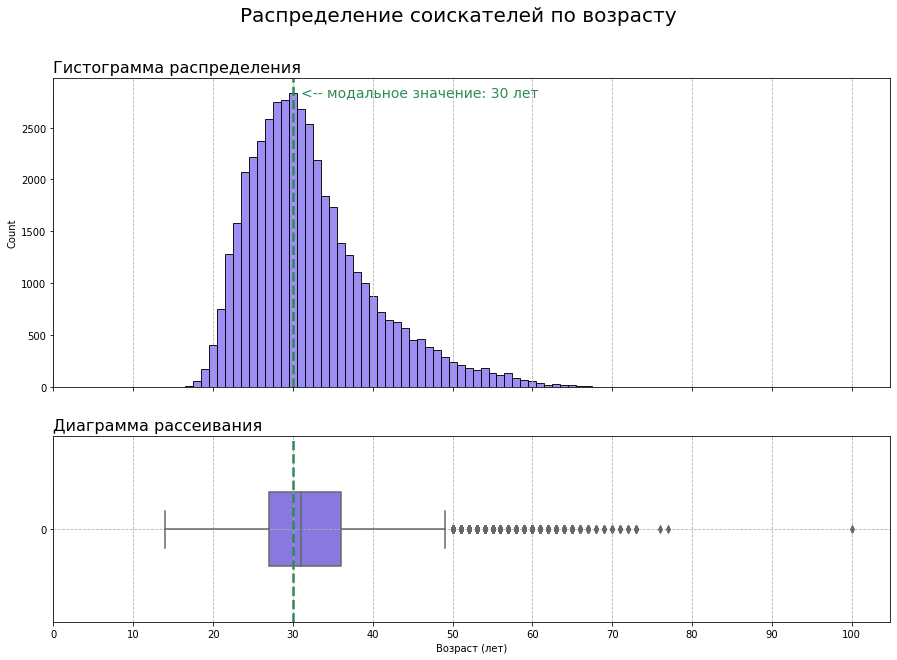

In [12]:
# подготовим данные для диаграмм:
data_age = hh_base['Возраст']
mode_age = (hh_base['Возраст'].mode()).max()
colors_age = ['mediumslateblue', 'seagreen']

# формируем размеры диаграмм:
fig1, ax1 = plt.subplots(nrows=2, ncols=1, sharex='col', figsize=(15, 10), gridspec_kw={'height_ratios': [5, 3]})
plt.suptitle('Распределение соискателей по возрасту', size=20)

# строим гистограмму распределения:
ax1[0].set_title('Гистограмма распределения', ha='left', x=.0, fontsize=16)
sns.histplot(ax=ax1[0], data=data_age, bins=100, discrete=True, color=colors_age[0]).xaxis.grid(linestyle='--')

# строим коробчатую диаграмму:
ax1[1].set_title('Диаграмма рассеивания', ha='left', x=.0, fontsize=16)
sns.boxplot(ax=ax1[1], data=data_age, color=colors_age[0], width=0.4, orient='h').grid(linestyle='--')

# для наглядности добавим линию модального значения:
ax1[0].axvline(x=mode_age, color=colors_age[1], ls='--', lw=2.5)
ax1[0].text(31, 2800, f'<-- модальное значение: {mode_age} лет', fontsize = 14, color=colors_age[1])
ax1[1].axvline(x=mode_age, color=colors_age[1], ls='--', lw=2.5)
ax1[1].set_xticks(np.arange(0, 105, 10))
ax1[1].set_xlabel('Возраст (лет)')

print(f'Показатель наклона распределения: {round(hh_base["Возраст"].skew(), 2)} - больше нуля, следовательно, асимметрия Правая');

#### Визуально оценивая распределение соискателей по возрасту, можно отметить:
 - *близко к нормальному;*
 - *модальное значение возраста лежит в районе отметки 30 лет и, большинство значений сконцентрировано в диапазоне 30 +-5 лет;*
 - *коробчатая диаграмма иллюстрирует то, что медианное значение совпадает или практически совпадает со среднем,
но немного смещено вправо, относительно моды. По графику видно, что линия медианы практически совпадает с центром ящика;*
 - *предельные значения признака - 14 и 100 лет. Последнее - явная аномалия, а вот значения в диапазоне от 50 до 80 лет,
соответствующие небольшой группе выбросов - вполне могут быть реальными данными (особенно интервал от 50 до 60 лет) .
Показатели 70+ уже более спорные, но не невероятные для поиска работы.*
 - *распределение немного не симметричное по форме - слева оно плотнее, столбцы выше, но их меньше; справа тянется небольшой
"Хвост". Это легко объясняется спецификой данных:
поскольку средние величины лежат в отметке 30 лет - большинство соискателей молодые люди. Интервал до верхней границы трудоспособного
возраста гораздо больше, чем до нижней.*

Прим. метод skew() примененная к столбцу дает положительное значение, которое говорит о правосторонней асимметрии.

### 2. Постройте распределение признака **"Опыт работы (месяц)"**.
Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

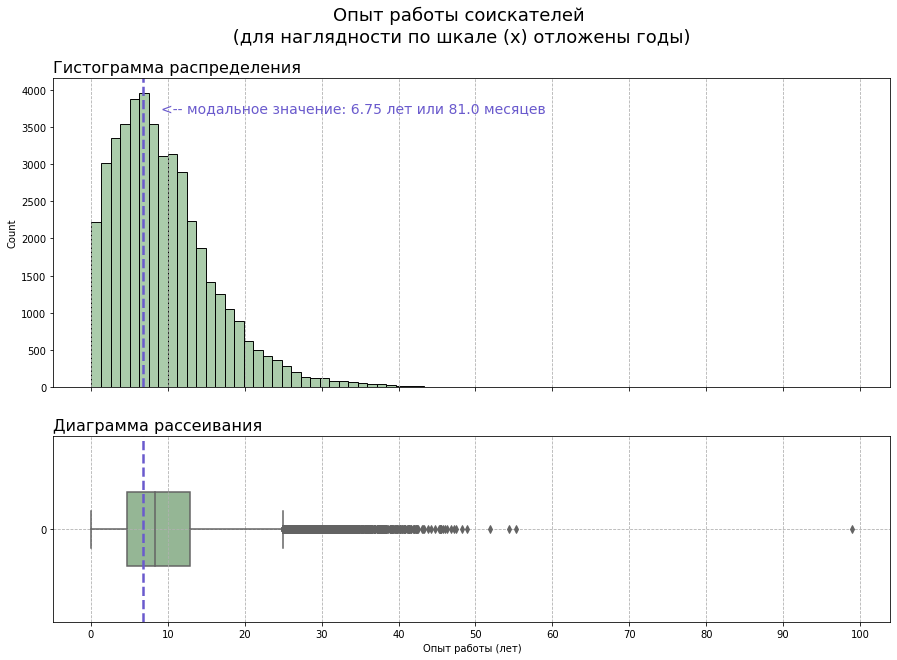

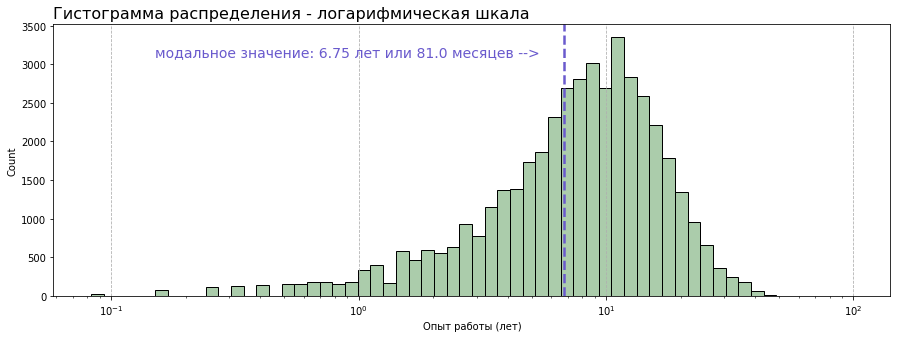

In [13]:
# подготовим данные для диаграмм:
data_exp = hh_base['Опыт работы (месяц)']
mode_exp = (hh_base["Опыт работы (месяц)"].mode()).max()
colors_exp = ['darkseagreen', 'slateblue']

# формируем размеры диаграмм:
fig2, ax2 = plt.subplots(nrows=2, ncols=1, sharex='col', figsize=(15, 10), gridspec_kw={'height_ratios': [5, 3]})
plt.suptitle('Опыт работы соискателей\n (для наглядности по шкале (х) отложены годы)', size=18)

# строим гистограмму распределения и коробчатую диаграмму:
ax2[0].set_title('Гистограмма распределения', ha='left', x=.0, fontsize=16)
sns.histplot(ax=ax2[0], data=data_exp, bins=80, color=colors_exp[0]).xaxis.grid(linestyle='--')
ax2[1].set_title('Диаграмма рассеивания', ha='left', x=.0, fontsize=16)
sns.boxplot(ax=ax2[1], data=data_exp, color=colors_exp[0], width=0.4, orient='h').grid(linestyle='--')

# для наглядности масштабируем шкалу из месяцев в годы и добавим линию модального значения:
ax2[0].axvline(x=mode_exp, color=colors_exp[1], ls='--', lw=2.5)
ax2[0].text(110, 3700, f'<-- модальное значение: {mode_exp / 12} лет или {mode_exp} месяцев', fontsize = 14, color=colors_exp[1])
ax2[1].axvline(x=mode_exp, color=colors_exp[1], ls='--', lw=2.5)
ax2[1].set_xticks(np.arange(0, 1260, 120))
ax2[1].set_xticklabels(np.arange(0, 105, 10))
ax2[1].set_xlabel('Опыт работы (лет)')

# строим логарифмическое представление:
fig3, ax3 = plt.subplots(figsize=(15, 5))
ax3.set_title('Гистограмма распределения - логарифмическая шкала', ha='left', x=.0, fontsize=16)
sns.histplot(ax=ax3, data=data_exp / 12, bins=60, log_scale=True, color=colors_exp[0]).xaxis.grid(linestyle='--')
ax3.set_xlabel('')
ax3.axvline(x=(mode_exp / 12), color=colors_exp[1], ls='--', lw=2.5)
ax3.text(0.15, 3100, f'модальное значение: {mode_exp / 12} лет или {mode_exp} месяцев -->', fontsize = 14, color=colors_exp[1])
ax3.set_xlabel('Опыт работы (лет)');

#### Визуализируя параметр "Опыт работы" делаем следующие выводы:
 - *данное распределение ближе к логнормальному, по-этому проще ориентироваться в данных совмещая визуализацию
по линейной и логарифмической шкалам. Это выглядит правдоподобно для такой относительно новой и модной сферы трудоустройства.
Количество людей проявляющих первоначальный интерес к сфере IT в последние годы растет с геометрической прогрессией;*

 - *модальное значение опыта лежит в районе 6-7 лет (или 81 месяца) и, половина значений сконцентрировано в диапазоне
примерно от 5 до 13 лет (это легко увидеть на коробчатой диаграмме), что объясняется причинами, названными в предыдущем пункте;*

 - *на этом распределении мода не совпадает с медианным значением еще сильнее, чем в предыдущей. На коробчатой диаграмме мы видим большое количество выбросов и аномалий справа.*

 - *предельные значения признака - 1 месяца до 99 лет. По сравнению с возрастом количество аномальных значений здесь значительно
выше. Во-первых, опыт работы - критерий более субъективный, чем возраст, указывая дату начала работы - проще допустить
ошибку. Во-вторых, некоторые соискатели возможно считают, что увеличив свои показатели опыта, они повышают шансы на трудоустройство.
А значение опыта работы - 99 лет - скорее всего, сообщил человек стремящийся привлечь внимание работодателя своей оригинальностью.*

### 3. Постройте распределение признака **"ЗП (руб)"**.
Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


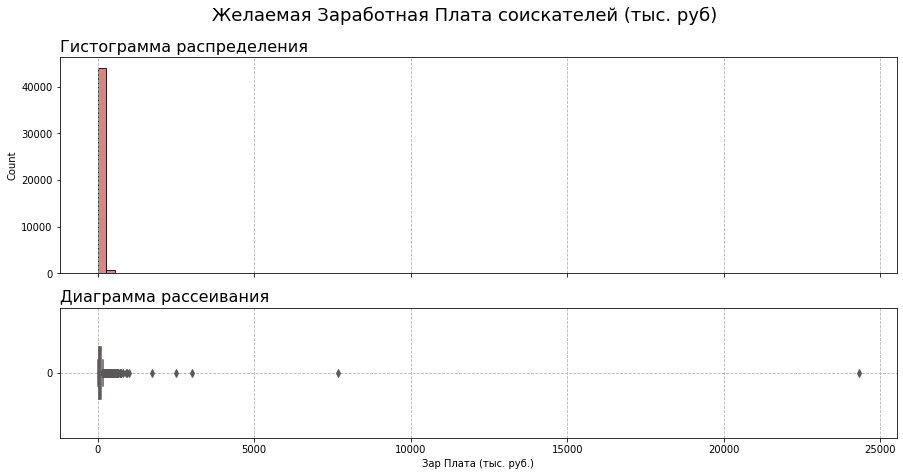

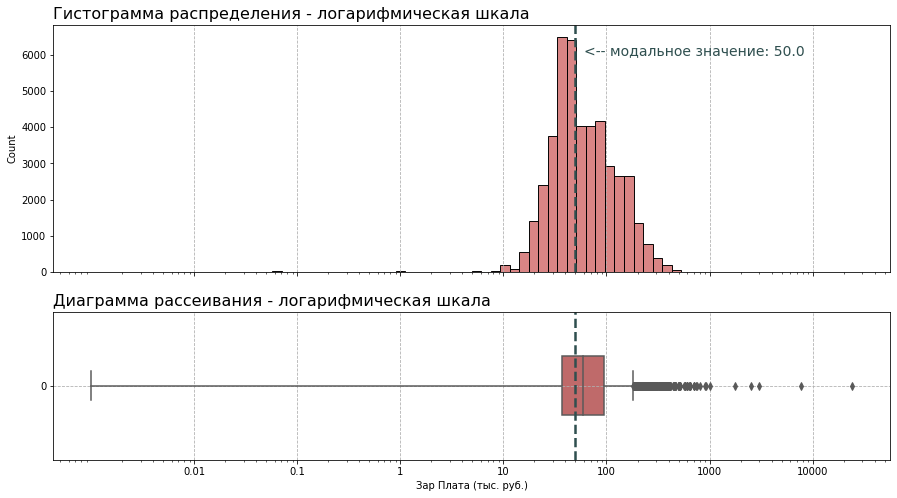

In [14]:
# подготовим данные для диаграмм:
data_sal = hh_base['ЗП (руб)']/1000
mode_sal = (hh_base['ЗП (руб)'].mode()/1000).max()
colors_sal = ['indianred', 'darkslategrey']

# формируем размеры диаграмм:
fig4, ax4 = plt.subplots(nrows=2, ncols=1, sharex='col', figsize=(15, 7), gridspec_kw={'height_ratios': [5, 3]})
plt.suptitle('Желаемая Заработная Плата соискателей (тыс. руб)', size=18)

# строим гистограмму распределения и коробчатую диаграмму:
ax4[0].set_title('Гистограмма распределения', ha='left', x=.0, fontsize=16)
sns.histplot(ax=ax4[0], data=data_sal, bins=90, color=colors_sal[0]).xaxis.grid(linestyle='--')
ax4[1].set_title('Диаграмма рассеивания', ha='left', x=.0, fontsize=16)
sns.boxplot(ax=ax4[1], data=data_sal, color=colors_sal[0], width=0.4, orient='h').grid(linestyle='--')
ax4[1].set_xlabel('Зар Плата (тыс. руб.)')

# совершенно нечитаемые графики говорят о невероятно выбивающихся из общей картины аномалий в данных
# попробуем использовать для построения распределения логарифмическую шкалу:
fig5, ax5 = plt.subplots(nrows=2, ncols=1, sharex='col', figsize=(15, 8), gridspec_kw={'height_ratios': [5, 3]})
ax5[0].set_title('Гистограмма распределения - логарифмическая шкала', ha='left', x=.0, fontsize=16)
sns.histplot(ax=ax5[0], data=data_sal, bins=80,  log_scale=True, color=colors_sal[0]).xaxis.grid(linestyle='--')
ax5[1].set_title('Диаграмма рассеивания - логарифмическая шкала', ha='left', x=.0, fontsize=16)
sns.boxplot(ax=ax5[1], data=data_sal, color=colors_sal[0], width=0.4, orient='h').grid(linestyle='--')
ax5[1].set_xlabel('')
ax5[1].set_xticks([0.01, 0.1, 1, 10, 100, 1000, 10000])
ax5[1].set_xticklabels([0.01, 0.1, 1, 10, 100, 1000, 10000])
ax5[1].set_xlabel('Зар Плата (тыс. руб.)')

# для наглядности добавим линию модального значения:
ax5[0].axvline(x=mode_sal, color=colors_sal[1], ls='--', lw=2.5)
ax5[0].text(60, 6000, f'<-- модальное значение: {mode_sal}', fontsize = 14, color=colors_sal[1])
ax5[1].axvline(x=mode_sal, color=colors_sal[1], ls='--', lw=2.5);

#### Визуализируя распределение показателя "Желаемая заработная плата":
* в данном распределении аномалии такого внушительного масштаба, что с визуализацией плохо справляется даже
логарифмическая шкала. Но в логарифмическом масштабе все же можно оценивать характер данных;
* модальное значение желаемой ЗП лежит в районе отметки в 50 тысяч, а большинство значений сконцентрировано
в диапазоне примерно от 40 до 100 тысяч рублей;
* в данном наборе данных довольно большое количество как экстремально низких, так и неестественно высоких значений. В-общем то это довольно легко объяснить:
    * Во-первых: значительное количество значений меньше 1 тыс. рублей можно объяснить ошибкой ввода данных / невнимательностью.
Скорее всего, соискатели просто не учитывали разрядность параметра и вводили например, 75 вместо 75 000.
    * Во-вторых: какая-то часть соискателей вполне возможно совсем не может/не хочет оценить уровень желаемой ЗП и
 указывает значение 1, не имея возможности оставить данное поле на сайте незаполненным или с нулем.
    * В-третьих: для экстремально высоких значений очень вероятны ошибки с курсом валют. Человек может указать сумму
желаемой ЗП в рублях, а валюту , например, доллар.
    * В-четвертых, люди, претендующие на очень высокооплачиваемые вакансии в компаниях за рубежом, могут указывать сумму желаемого
 годового, а не месячного дохода, так как это принято, например, в США.
 И так далее;
* предельные значения признака - от 1 рубля до примерно 24 млн. рублей. Очень амбициозно!)))

Какими бы ни были причины аномалий, они безусловно очень мешают анализу данных и, на данных диаграммах это очень хорошо проиллюстрировано.

### 4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**).
Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

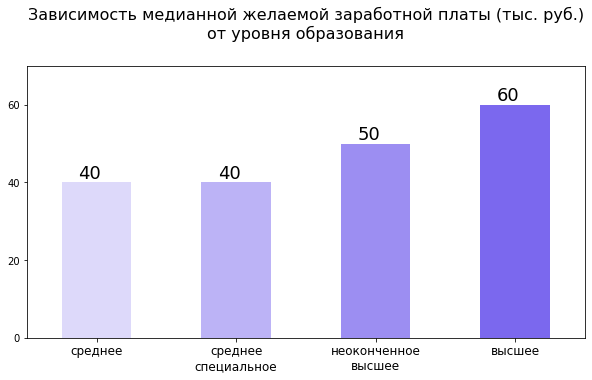

In [15]:
# подготовим данные для диаграммы, сгруппируем и упорядочим по возрастанию уровня образования:
pivot_sal_on_edu = hh_base[hh_base['ЗП (руб)'] < 1000000].groupby('Образование')['ЗП (руб)'].median()
list_edu = ['среднее', 'среднее специальное', 'неоконченное высшее', 'высшее']
data_sal_on_edu = pivot_sal_on_edu[list_edu] / 1000
color_sal_on_edu = [[0.482, .408, .933, .25], [0.482, .408, .933, .5], [0.482, .408, .933, .75], [0.482, .408, .933, 1]]

# строим диаграмму:
fig6, ax6 = plt.subplots(figsize=(10, 5))
sal_on_edu = data_sal_on_edu.plot(kind='bar', color=color_sal_on_edu, rot=0)
ax6.set_title('Зависимость медианной желаемой заработной платы (тыс. руб.)\nот уровня образования\n', pad = 10, size=16)
ax6.set_xlabel('')
ax6.set_yticks(range(0, 100, 20))
ax6.set_yticklabels(range(0, 100, 20))
ax6.set_xticklabels(['среднее', 'среднее\nспециальное', 'неоконченное\nвысшее', 'высшее'], fontsize=12)

# для наглядности добавим на диаграмму подписи данных:
for p in sal_on_edu.patches:
    sal_on_edu.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
    ha='center', va='bottom', fontsize=18)

plt.ylim(0, 70);

#### Данная визуализация иллюстрирует предельно прямолинейную зависимость: чем выше уровень образования - тем выше медианный уровень желаемой заработной платы.

*Глядя на диаграмму - делаем вывод: для соискателей со среднем или среднем специальным образованием медианный желаемый уровень ЗП в полтора раза ниже, чем для соискателей с высшим образованием.*

Такая явная зависимость делает очевидным то, что использование критерия "Образование" сделает прогнозирования желаемой заработной платы соискателей более точным.

### 5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**).
Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

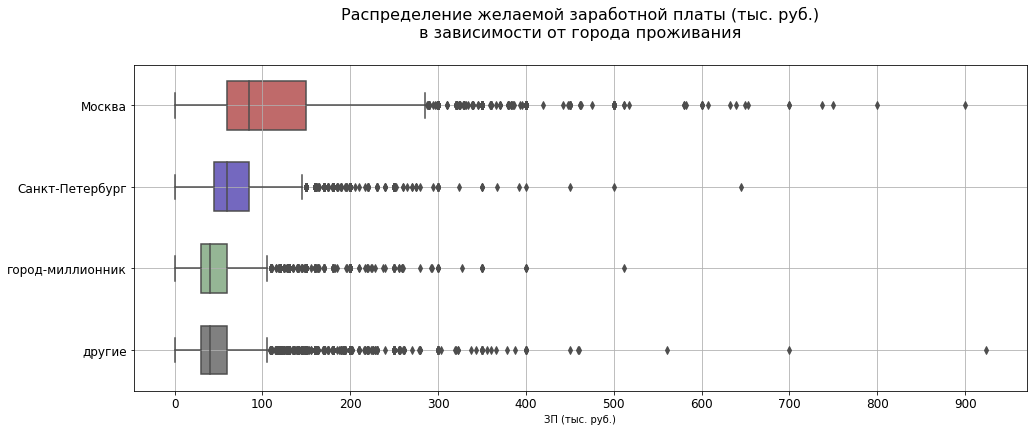

In [16]:
# строим диаграмму:
fig7, ax7 = plt.subplots(figsize=(16, 6))
sal_on_city = sns.boxplot(
    data=hh_base[hh_base['ЗП (руб)'] < 1000000],
    x='ЗП (руб)',
    y='Город',
    order=['Москва', 'Санкт-Петербург', 'город-миллионник', 'другие'],
    palette=['indianred', 'slateblue', 'darkseagreen', 'grey'],
    width=0.6
)
ax7.set_title('Распределение желаемой заработной платы (тыс. руб.)\nв зависимости от города проживания\n', pad = 10, size=16)
ax7.set_ylabel('')
ax7.set_yticklabels(['Москва', 'Санкт-Петербург', 'город-миллионник', 'другие'], fontsize=12)
ax7.set_xlabel('ЗП (тыс. руб.)')
ax7.set_xticks(range(0, 1000000, 100000))
ax7.set_xticklabels(range(0, 1000, 100), fontsize=12)
ax7.grid();

#### Эта диаграмма визуализирует довольно устойчивую тенденцию - требования к зарплате в Санкт-Петербурге и особенно в Москвы выше, чем у соискателей из остальной России.

*Распределение для москвичей значительно менее плотное, что естественно. Количество и разнообразие возможностей для трудоустройства в Москве несоизмеримо выше, чем в остальной России. Даже показатели Санкт-Петербурга в части межквартильного размаха (то сть диапазон половины значений) ближе скорее к остальной России, нежели к Москве.*
*Этот результат в-общем то предсказуем. Но интересно то, что практически не отличается уровень требований у соискателей из нестоличных крупных городов и всех остальных.
Ожидания по заработной плате похоже не сильно не различаются в остальной России (кроме Москвы и Санкт-Петербурга). Возможно, это связано с неравномерным распределением крупных IT компаний России, которые конечно сосредоточены в двух столицах. Соискатели из остальной России одинаковы для столичных работодателей с точки зрения оплаты их труда в случае удаленной работы или переезда.*

При построении распределения по желаемой ЗП без разбивки на города, уже отмечалось большое количество мешающих визуализации выбросов. Можно наблюдать это и на данной диаграмме.

В признаке "Город" разброс медианных значений между категориями еще больше, чем в признаке "Образование". Это значит, что необходимость его использования для построения прогнозов по ожидаемой ЗП еще более очевидна.

### 6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб.)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**.
Проанализируйте график, сравнив уровень заработной платы в категориях.

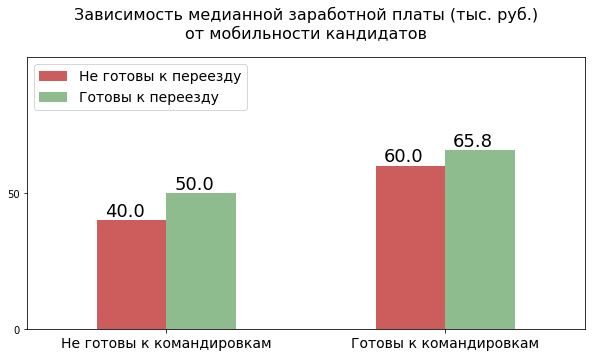

In [17]:
# подготовим данные для диаграммы:
pivot_sal_on_mob = (hh_base.groupby(['Готовность к командировкам', 'Готовность к переезду'])['ЗП (руб)'].median().unstack())/1000
color_sal_on_mob = ['indianred', 'darkseagreen']

# строим диаграмму:
fig8, ax8 = plt.subplots(figsize=(10, 5))
sal_on_mob = pivot_sal_on_mob.plot(ax=ax8, kind='bar', color=color_sal_on_mob, label=['Не готовы к переезду', 'Готовы к переезду'], rot=0)

ax8.set_title('Зависимость медианной заработной платы (тыс. руб.)\nот мобильности кандидатов', pad = 20, size=16)
ax8.set_xlabel('')
ax8.set_yticks(range(0, 100, 50))
ax8.set_yticklabels(range(0, 100, 50))
ax8.set_xticklabels(['Не готовы к командировкам', 'Готовы к командировкам'], fontsize=14)
ax8.legend(['Не готовы к переезду', 'Готовы к переезду'], loc='upper left', fontsize=14)

# для наглядности добавим на диаграмму подписи данных:
for p in sal_on_mob.patches:
    sal_on_mob.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()),
    ha='center', va='bottom', fontsize=18)

plt.ylim(0, 100);

#### Эта диаграмма визуализирует следующие зависимости:

*Чем выше уровень мобильности кандидатов, тем выше требования к заработной плате. Причем готовность к командировкам сильнее влияет на уровень медианной заработной планы, чем готовность к переезду. Возможно это связано с тем, что готовность к переезду в основном проявляют соискатели из нестоличных городов, где базовые требования к оплате труда значительно ниже.*

### 7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**.
Проанализируйте тепловую карту, сравнив показатели внутри групп.

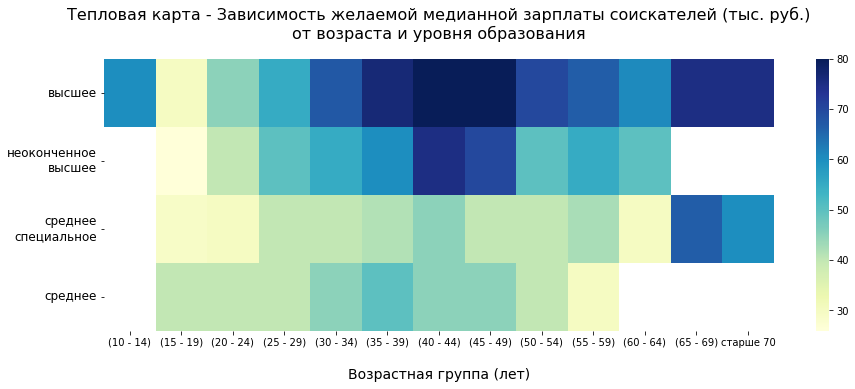

In [18]:
# подготовим данные для диаграммы:
# для наглядности сгруппируем возраста соискателей по группам с заданным шагом:
def get_age_category(age):
    return f'({(age // 5) * 5} - {(age // 5) * 5 + 4})' if age < 70 else 'старше 70'


# формируем сводную таблицу
hh_base['Возрастная группа'] = hh_base['Возраст'].apply(get_age_category)
pivot_sal_on_age_edu = hh_base.pivot_table(values='ЗП (руб)', index='Образование', columns='Возрастная группа', aggfunc='median')
pivot_sal_on_age_edu = pivot_sal_on_age_edu / 1000
pivot_sal_on_age_edu.index = pd.CategoricalIndex(pivot_sal_on_age_edu.index,
    categories= ['высшее', 'неоконченное высшее', 'среднее специальное', 'среднее'])
pivot_sal_on_age_edu.sort_index(level=0, ascending=True, inplace=True)

# строим диаграмму:
fig9, ax9 = plt.subplots(1, 1, figsize = (15, 5))
sal_on_age_edu = sns.heatmap(data=pivot_sal_on_age_edu, cmap='YlGnBu')

ax9.set_yticklabels(['высшее', 'неоконченное\nвысшее', 'среднее\nспециальное', 'среднее'], fontsize=12)
ax9.set_ylabel('')
ax9.set_xlabel('\nВозрастная группа (лет)', fontsize=14)
sal_on_age_edu.set_title('Тепловая карта - Зависимость желаемой медианной зарплаты соискателей (тыс. руб.)\nот возраста и уровня образования', fontsize=16, pad=20)

# удалим вспомогательный столбец:
hh_base = hh_base.drop('Возрастная группа', axis=1);

#### Анализируя данную тепловую карту выявляем следующие зависимости:

* Требования к величине заработной платы ожидаемо выше в группах среднего возраста с более высоким уровнем образования.
Самые высокие требования предъявляют кандидаты с высшим образованием от 40 до 50 лет. Очевидно это специалисты имеющие высокую квалификацию достаточный для высокооплачиваемых должностей опыт работы.
* Несмотря на общую тенденцию снижения медианной ЗП по мере удаления от средней возрастной группы (как в сторону омоложения, так и в сторону старения кандидатов) интересно отметить довольно высокие показатели в группах кандидатов преклонного возраста. Скорее всего это люди имеющий огромный опыт работы и претендующие на какие-либо руководящие должности. Причем среди специалистов со средним специальным образованием - ожидания по заработной плате у кандидатов 65+ вообще самые высокие в категории. Можно предположить, что эта группа очень малочисленна, и люди преклонного возраста размещают свои резюме на сайте обладая уверенностью в своей конкурентоспособности.
* Интересно отметить, что показатели по средним возрастным группам со школьным образованием выше, нежели у соискателей со средним специальным. Похоже, что активно развивающийся в последнее время рынок онлайн-образования в сфере IT создает неплохую альтернативу среднему профессиональному образованию.
* Так же бросается в глаза яркая заливка, соответствующая кандидату / кандидатам до 15 лет с высшим (!) образованием. Скорее всего это ошибка ввода данных возраста или стремление привлечь внимание работодателя оригинальностью.

### 8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**).
Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

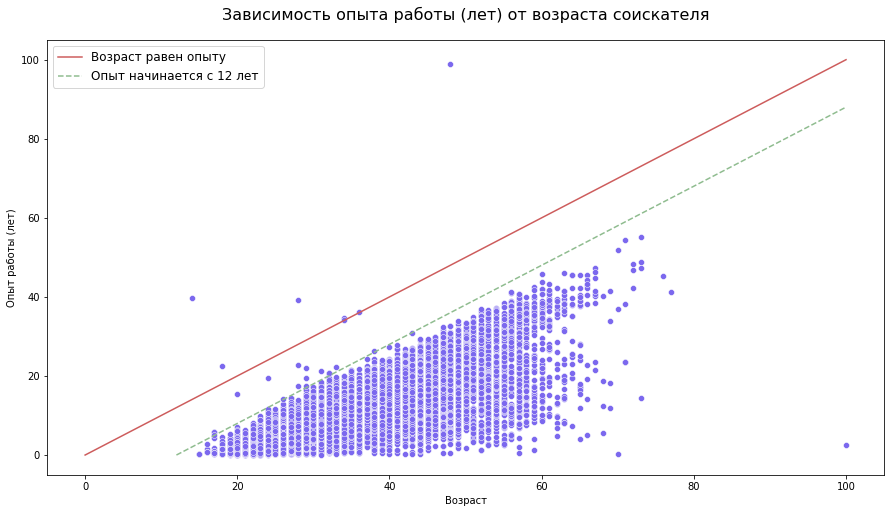

In [19]:
# подготовим данные для диаграммы:
hh_base['Опыт работы (лет)'] = hh_base['Опыт работы (месяц)'] / 12

# строим диаграмму:
fig10, ax10 = plt.subplots(1, 1, figsize = (15, 8))
exp_on_age = sns.scatterplot(data=hh_base, x = 'Возраст', y = 'Опыт работы (лет)', color = 'mediumslateblue')
exp_on_age.set_title('Зависимость опыта работы (лет) от возраста соискателя', fontsize=16, pad=20)\

# рисуем контрольные линии:
x1, x2, y1, y2 = [0, 100], [12, 100], [0, 100], [0, 88]
plt.plot(x1, y1, label='Возраст равен опыту', c='indianred')
plt.plot(x2, y2, label='Опыт начинается с 12 лет', c='darkseagreen', ls='--')
plt.legend(fontsize=12)

# удалим вспомогательный столбец:
hh_base = hh_base.drop('Опыт работы (лет)', axis=1);

#### Данная визуализация легко позволяет выявить аномалии в данных:
Все точки лежащие на / за пределами контрольной линии являются явными аномалиями. Однако кажется, что не только совпадение величины опыта и возраста лежат за пределами здравого смысла. Сложно представить ситуацию, когда соискатель начал получать опыт работы в 12 лет и раньше - пунктирная линия на графике иллюстрирует наличие аномалий подобного рода.

### **Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


#### **Дополнительные баллы - Посмотрим отличие медианных заработных плат в зависимости от половой принадлежности соискателя:**
#### 1) Сначала в зависимости от уровня образования;
#### 2) Затем с разбивкой по городам проживания:

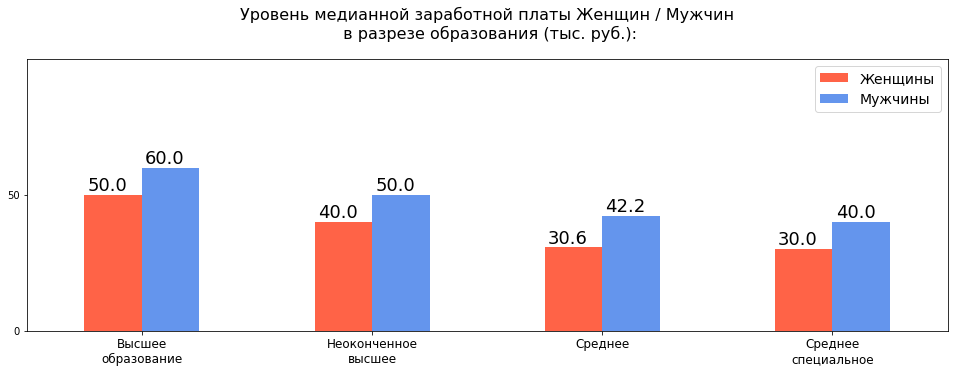

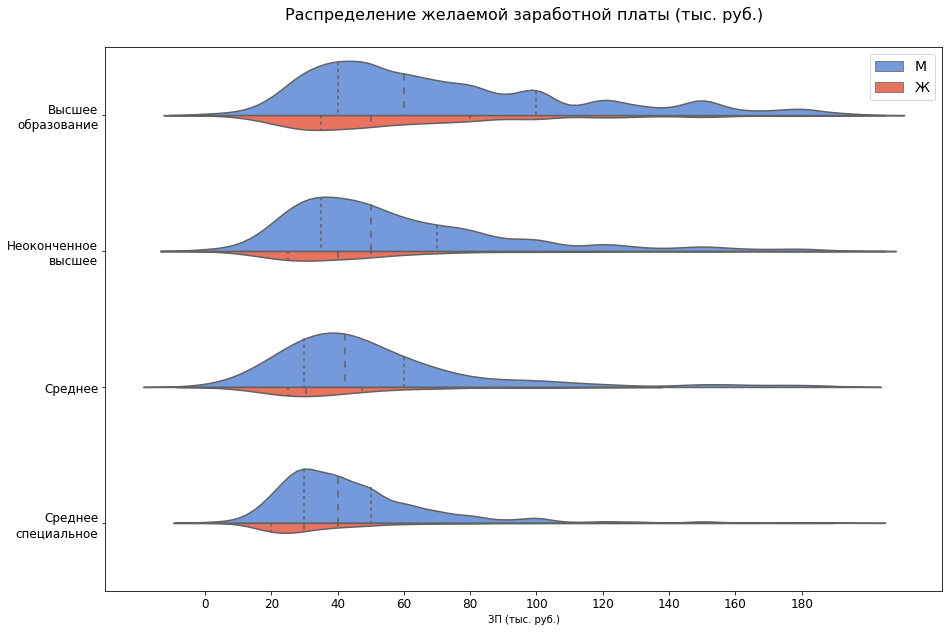

In [20]:
# исследуем влияние гендера соискателя на уровень желаемой заработной платы:
fig12, ax12 = plt.subplots(1, 1, figsize = (15, 5))
data_sal_on_sex = (hh_base[hh_base['ЗП (руб)'] < 200000].groupby(['Образование', 'Пол'])['ЗП (руб)'].median().unstack())/1000
sal_on_sex = data_sal_on_sex.plot(ax=ax12, kind='bar', color=['tomato', 'cornflowerblue'], label=['Мужчины', 'Женщины'], rot=0)

ax12.set_title('Уровень медианной заработной платы Женщин / Мужчин\n в разрезе образования (тыс. руб.):', pad = 20, size=16)
ax12.set_xlabel('')
ax12.set_xticklabels(['Высшее\nобразование', 'Неоконченное\nвысшее', 'Среднее', 'Среднее\nспециальное'], fontsize=12)
ax12.set_yticks(range(0, 100, 50))
ax12.set_yticklabels(range(0, 100, 50))
ax12.legend(labels=['Женщины', 'Мужчины'], loc='upper right', fontsize=14)

for p in sal_on_sex.patches:
    sal_on_sex.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()),
    ha='center', va='bottom', fontsize=18)
plt.ylim(0, 100)

pos1 = ax12.get_position()
pos2 = [pos1.x0 * 0.5, pos1.y0,  pos1.width * 1.1, pos1.height]
ax12.set_position(pos2)

fig11, ax11 = plt.subplots(1, 1, figsize = (15, 10))
sal_on_exp_sex = sns.violinplot(data=hh_base[hh_base['ЗП (руб)'] < 200000][['ЗП (руб)', 'Образование', 'Пол']],
    y='Образование', x='ЗП (руб)', hue='Пол', hue_order=['М', 'Ж'], split=True, scale='count', palette=['cornflowerblue', 'tomato'],
    inner='quartile'
)
ax11.legend(loc='upper right', fontsize=14)
ax11.set_title('Распределение желаемой заработной платы (тыс. руб.)\n', pad = 10, size=16)
ax11.set_ylabel('')
ax11.set_yticklabels(['Высшее\nобразование', 'Неоконченное\nвысшее', 'Среднее', 'Среднее\nспециальное'], fontsize=12)
ax11.set_xlabel('ЗП (тыс. руб.)')
ax11.set_xticks(range(0, 200000, 20000), )
ax11.set_xticklabels(range(0, 200, 20), fontsize=12);

На данных диаграммах мы видим очень внятную закономерность - медианный уровень желаемой заработной платы у соискателей женщин во всех группах меньше, чем у мужчин на 10 - 12 тысяч рублей! На данный момент мы понимаем, что женщины не чувствуют достаточной уверенности на рынке труда, особенно в сфере IT, чтобы претендовать на столь же высокооплачиваемые должности, как и кандидаты мужчины. Как часть этой закономерности - факт того, что количество соискателей женщин - на порядок меньше, чем мужчин (это хорошо видно на скрипичных диаграммах - площадь "женских половинок" совсем небольшая).

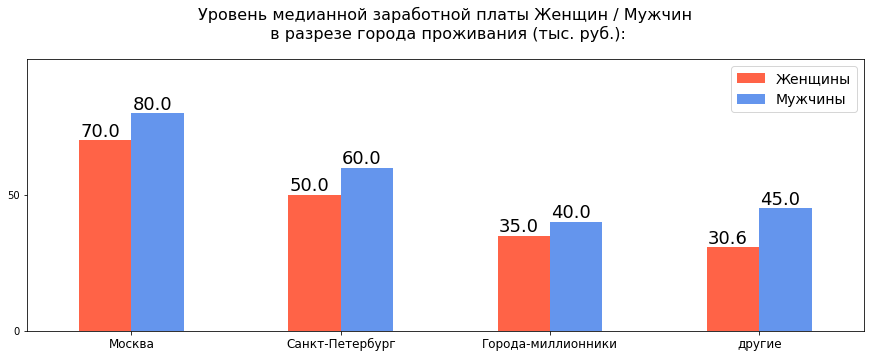

In [21]:

fig13, ax13 = plt.subplots(1, 1, figsize = (15, 5))
data_sal_on_sex = (hh_base[hh_base['ЗП (руб)'] < 200000].groupby(['Город', 'Пол'])['ЗП (руб)'].median().unstack())/1000
sal_on_sex = data_sal_on_sex.plot(ax=ax13, kind='bar', color=['tomato', 'cornflowerblue'], label=['Мужчины', 'Женщины'], rot=0)

ax13.set_title('Уровень медианной заработной платы Женщин / Мужчин\n в разрезе города проживания (тыс. руб.):', pad = 20, size=16)
ax13.set_xlabel('')
ax13.set_xticklabels(['Москва', 'Санкт-Петербург', 'Города-миллионники', 'другие'], fontsize=12)
ax13.set_yticks(range(0, 100, 50))
ax13.set_yticklabels(range(0, 100, 50))
ax13.legend(labels=['Женщины', 'Мужчины'], loc='upper right', fontsize=14)

for p in sal_on_sex.patches:
    sal_on_sex.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()),
    ha='center', va='bottom', fontsize=18)

plt.ylim(0, 100);

Тенденция сильного отличия зарплат мужчин и женщин тут также явно сохранятся. Отметим интересную деталь - это различие сильнее всего сглаживается в крупных, но не столичных, городах. А вот в остальной России напротив - усиливается. Это может быть связано как с тем, что в крупных городах женщины больше претендуют на более высокооплачиваемые вакансии, так и с тем, что в последнюю категорию попадает большое количество кандидатов из Подмосковья и ближайших городов. Возможно кандидаты мужчины рассматривают больше вариантов высокооплачиваемой удаленной работы или стремятся к переезду для работы на более высокооплачиваемых должностях.

#### **Бонусный график)**
#### Очень интересно все же посмотреть на рынок вакансий в сфере IT предметно! То есть, по вакансиям.

Руководитель                                         10366
Программист                                           5462
Инженер                                               5236
Системный администратор                               5132
Технический специалист                                3867
Начинающий специалист                                 1833
Аналитик                                              1690
Менеджер по продажам                                  1582
Специалист технической поддержки                      1289
Оператор                                               916
SEO-специалист                                         731
Тестировщик                                            671
Дизайнер                                               649
Контент-менеджер                                       488
Специалист по работе с клиентами                       393
Верстальщик                                            160
Специалист по информационной безопасности              1

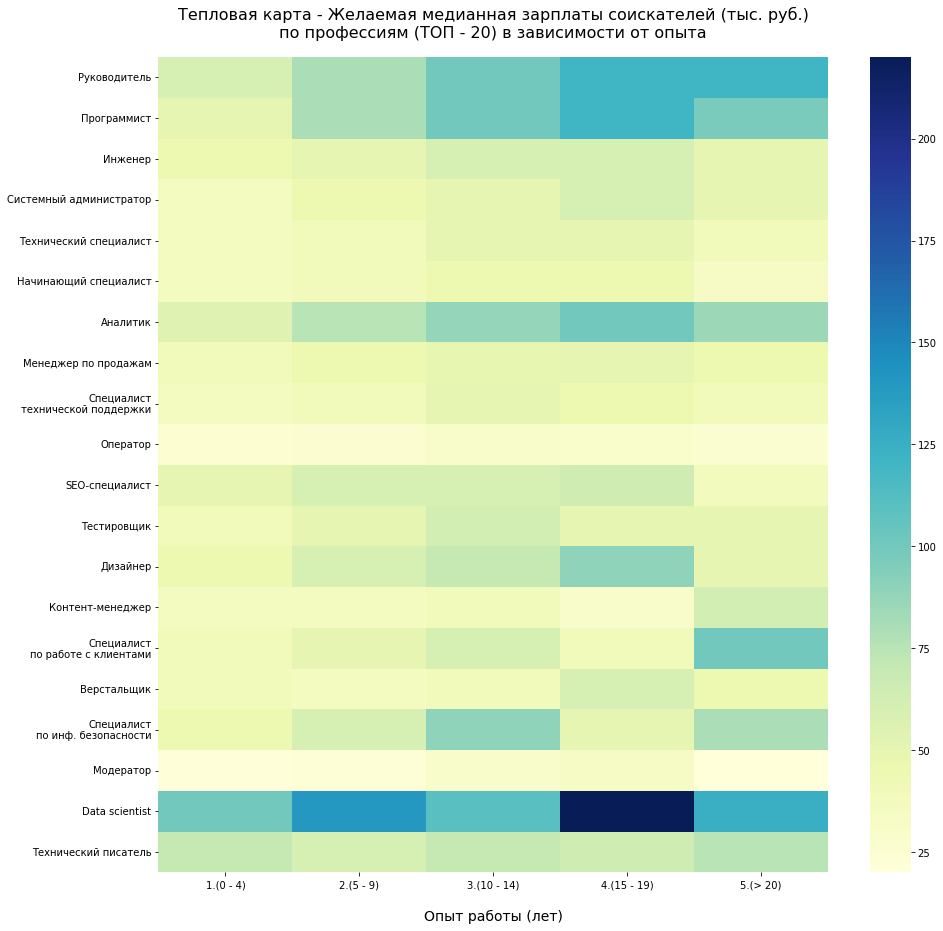

In [22]:
# Поскольку это очень большой массив разнообразных данных, я вынесла функцию обработки столбца с желаемой вакансией в отдельный файл.
from special_functions import get_profession
hh_base['Должность'] = hh_base['Ищет работу на должность:'].apply(get_profession)

first_20_prof = hh_base["Должность"].value_counts(normalize=True)[:20]
print(f'Первые 20 по популярности должностей охватывают: {round(first_20_prof.sum() * 100)}% записей')

# сохраним этот список:
prof_list = first_20_prof.index.tolist()

# разделим опыт работы на категории
def get_exp_category(month):
    year = month / 12
    return f'{int((year // 5)+1)}.({int((year // 5) * 5)} - {int((year // 5) * 5 + 4)})' if year < 20 else '5.(> 20)'


hh_base['Опыт'] = hh_base['Опыт работы (месяц)'].apply(get_exp_category)

# формируем сводную таблицу
pivot_sal_on_prof = hh_base[hh_base['Должность'].isin(prof_list)].pivot_table(
    values='ЗП (руб)', index='Должность', columns='Опыт', aggfunc='median'
)
pivot_sal_on_prof = pivot_sal_on_prof / 1000
pivot_sal_on_prof.index = pd.CategoricalIndex(pivot_sal_on_prof.index, categories=prof_list)
pivot_sal_on_prof.sort_index(level=0, ascending=True, inplace=True)

# строим диаграмму:
labels_list = ['Руководитель', 'Программист', 'Инженер', 'Системный администратор', 'Технический специалист', 'Начинающий специалист', 'Аналитик', 'Менеджер по продажам', 'Специалист\nтехнической поддержки', 'Оператор', 'SEO-специалист', 'Тестировщик', 'Дизайнер', 'Контент-менеджер', 'Специалист\nпо работе с клиентами', 'Верстальщик', 'Специалист\nпо инф. безопасности', 'Модератор', 'Data scientist', 'Технический писатель']

fig14, ax14 = plt.subplots(1, 1, figsize = (15, 15))
sal_on_prof = sns.heatmap(data=pivot_sal_on_prof, cmap='YlGnBu')

ax14.set_yticklabels(labels_list, fontsize=10)
ax14.set_ylabel('')
ax14.set_xlabel('\nОпыт работы (лет)', fontsize=14)
sal_on_prof.set_title('Тепловая карта - Желаемая медианная зарплаты соискателей (тыс. руб.)\nпо профессиям (ТОП - 20) в зависимости от опыта',
                      fontsize=16, pad=20)

# посмотрим на распределение ЗП по должностям без учета опыта, используя библиотеку plotly express:
fig15 = px.box(hh_base[(hh_base['Должность'].isin(prof_list)) & (hh_base['ЗП (руб)'] < 300000)],
               title='Распределение желаемой ЗП по должностям', x='ЗП (руб)', y='Должность', color='Должность', width=1500, height=1500)
fig15.write_html('box_salary_on_profession.html')
# интерактивную визуализацию данного графика можно посмотреть в папке проекта.
fig15.write_image('box_salary_on_profession.png')

hh_base = hh_base.drop(['Должность', 'Опыт'], axis=1);

Данная картина внушает огромный оптимизм студенту аналитику! Data science - сегодня одно из самых перспективных направлений. Конечно, будем делать скидку на то, что это выгрузка двухлетней давности и, сейчас, по мере роста интереса к данной сфере, растет количество предложений по обучению, а следовательно и специалистов которые ищут себя в новой профессии.

# Очистка данных

### 1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их.

In [23]:
# сохраним в переменную информацию о количестве дублирующихся строк, это понадобится для ответов на контрольные вопросы:
hh_base_duplicates = hh_base.duplicated().sum()

# теперь удалим их из базы:
hh_base = hh_base.drop_duplicates()


# РАСЧЕТЫ ДЛЯ ОТВЕТОВ НА КОНТРОЛЬНЫЕ ВОПРОСЫ:
# Задание 5.1
# Сколько полных копий удалось найти?
print(f'Полных копий резюме в базе: {hh_base_duplicates}')

Полных копий резюме в базе: 161


### 2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах.

In [24]:
# выведем информацию о столбцах с пропусками:
print(f'\nСтолбцы с пропусками данных:\n{hh_base.isnull().sum()[hh_base.isnull().sum() > 0]}')

# РАСЧЕТЫ ДЛЯ ОТВЕТОВ НА КОНТРОЛЬНЫЕ ВОПРОСЫ:
# Задание 5.2
# Сколько пропусков в столбце «Опыт работы (месяц)»?
print(f'\nПропусков в столбце «Опыт работы (месяц)»: {hh_base["Опыт работы (месяц)"].isnull().sum()}')


Столбцы с пропусками данных:
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                168
dtype: int64

Пропусков в столбце «Опыт работы (месяц)»: 168


### 3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**.
Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [25]:
# удалим строки, где есть пропуск в столбцах с местом работы и должностью:
hh_base = hh_base.drop(hh_base[(hh_base['Последнее/нынешнее место работы'].isnull())
                               | (hh_base['Последняя/нынешняя должность'].isnull())].index)

# пропуски в столбце с опытом работы заполним медианным значением:
exp_median = hh_base['Опыт работы (месяц)'].median()
hh_base['Опыт работы (месяц)'] = hh_base['Опыт работы (месяц)'].fillna(exp_median)

# РАСЧЕТЫ ДЛЯ ОТВЕТОВ НА КОНТРОЛЬНЫЕ ВОПРОСЫ:
# Задание 5.3
# Чему равно результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков? Ответ округлите до целых.
print(f'Результирующее среднее значение в столбце «Опыт работы (месяц)»: {round(hh_base["Опыт работы (месяц)"].mean())}')

Результирующее среднее значение в столбце «Опыт работы (месяц)»: 114


### 4. Мы добрались до ликвидации выбросов.
Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [26]:
# запомним размер таблицы с данными:
rows_before_drop = hh_base.shape[0]

# удаляем строки соответствующие условию:
hh_base = hh_base.drop(hh_base[(hh_base['ЗП (руб)'] > 1000000) | (hh_base['ЗП (руб)'] < 1000)].index)

# РАСЧЕТЫ ДЛЯ ОТВЕТОВ НА КОНТРОЛЬНЫЕ ВОПРОСЫ:
# Задание 5.4
# Сколько выбросов вы нашли?
print(f'Количество найденных выбросов: {rows_before_drop - hh_base.shape[0]}')

Количество найденных выбросов: 89


### 5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**.
Найдите такие резюме и удалите их из данных


In [27]:
# еще раз запомним размер таблицы с данными:
rows_before_drop = hh_base.shape[0]

# удаляем строки соответствующие условию:
hh_base = hh_base.drop(hh_base[(hh_base['Опыт работы (месяц)'] / 12) > hh_base['Возраст']].index)

# РАСЧЕТЫ ДЛЯ ОТВЕТОВ НА КОНТРОЛЬНЫЕ ВОПРОСЫ:
# Задание 5.5
# Сколько выбросов вы нашли?
rows_after_drop = hh_base.shape[0]
print(f'Количество найденных выбросов: {rows_before_drop - hh_base.shape[0]}')

Количество найденных выбросов: 7


### 6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**.
Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

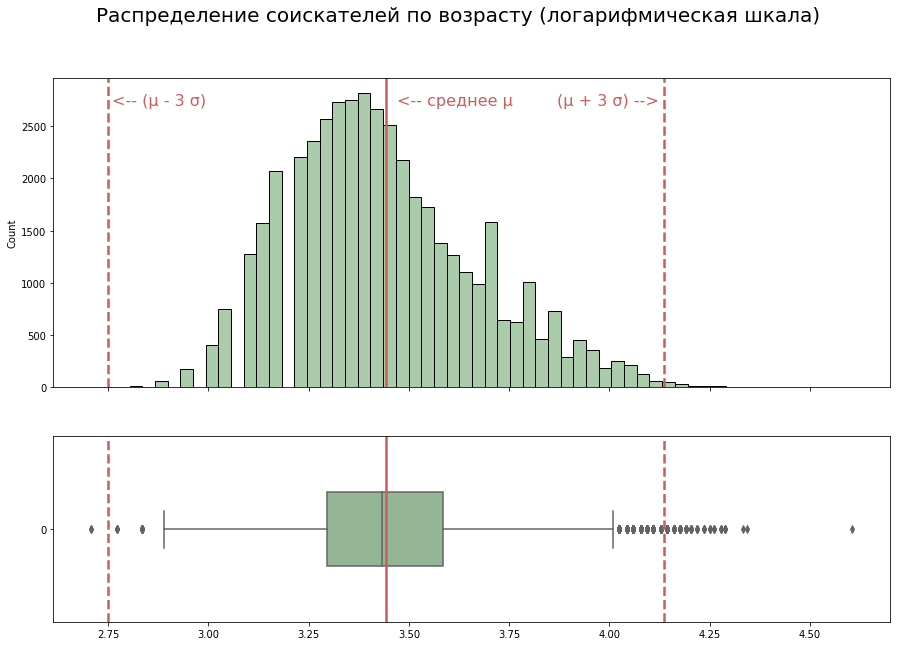

Показатель наклона распределения: 0.46 - больше нуля, следовательно, асимметрия Правая

Столбец "Возраст" таблицы с полученными выбросами:
31137     15
32950     15
33654    100
Name: Возраст, dtype: int8

Найдено выбросов с помощью метода z-отклонений: 3


In [28]:
# подготовим данные для диаграммы:
data_age_log = (np.log(hh_base['Возраст'])).astype(float)

# строим диаграммы:
fig16, ax16 = plt.subplots(nrows=2, ncols=1, sharex='col', figsize=(15, 10), gridspec_kw={'height_ratios': [5, 3]})
plt.suptitle('Распределение соискателей по возрасту (логарифмическая шкала)', size=20)
sns.histplot(ax=ax16[0], data=data_age_log, bins=60, color='darkseagreen')
sns.boxplot(ax=ax16[1], data=data_age_log, color='darkseagreen', width=0.4, orient='h')

# добавляем линии среднего и сигм:
ax16[0].axvline(x=data_age_log.mean(), color='indianred', ls='-', lw=2.5)
ax16[1].axvline(x=data_age_log.mean(), color='indianred', ls='-', lw=2.5)
ax16[0].axvline(x=(data_age_log.mean() - 3 * data_age_log.std()), color='indianred', ls='--', lw=2.5)
ax16[1].axvline(x=(data_age_log.mean() - 3 * data_age_log.std()), color='indianred', ls='--', lw=2.5)
ax16[0].axvline(x=(data_age_log.mean() + 3 * data_age_log.std()), color='indianred', ls='--', lw=2.5)
ax16[1].axvline(x=(data_age_log.mean() + 3 * data_age_log.std()), color='indianred', ls='--', lw=2.5)
ax16[0].text(3.47, 2700, '<-- среднее \u03BC', fontsize = 16, color='indianred')
ax16[0].text(2.76, 2700, '<-- (\u03BC - 3 \u03C3)', fontsize = 16, color='indianred')
ax16[0].text(3.87, 2700, '(\u03BC + 3 \u03C3) -->', fontsize = 16, color='indianred')

plt.show()

# проверим асимметрию:
print(f'Показатель наклона распределения: {round(data_age_log.skew(), 2)} - больше нуля, следовательно, асимметрия Правая')


# функция, реализующая алгоритм метода z-отклонения:
def outliers_z_score(data_frame, feature, log_scale=False, coef=0, left=3.0, right=3.0):
    """Getting the amount of the desired salary and currency
       Args:
           data_frame (pandas.DataFrame): data table
           feature (str): feature name for outlier search
           log_scale (bool): if True logarithm applied
           coef (int): default 0, if the data in the column contains 0 - it should be 1
           left (float): default 3, coefficient for the left interval
           right (float): default 3, coefficient for the right interval
        Returns:
           (pandas.DataFrame, pandas.DataFrame): (outlier data, cleaned data)
       """
    x = (np.log(data_frame[feature] + coef)).astype(float) if log_scale else data_frame[feature]
    mu = x.mean()
    sigma = x.std()

    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma

    outliers = data_frame[(x < lower_bound) | (x > upper_bound)]
    cleaned = data_frame[(x > lower_bound) & (x < upper_bound)]

    return outliers, cleaned

hh_base_outliers, hh_base = outliers_z_score(hh_base, 'Возраст', log_scale=True, right=4)

print(f'\nСтолбец "Возраст" таблицы с полученными выбросами:\n{round(hh_base_outliers["Возраст"])}')

# РАСЧЕТЫ ДЛЯ ОТВЕТОВ НА КОНТРОЛЬНЫЕ ВОПРОСЫ:
# Задание 5.6
# Сколько выбросов вы нашли с помощью метода z-отклонений?
print(f'\nНайдено выбросов с помощью метода z-отклонений: {round(hh_base_outliers.shape[0])}');

Легко заметить, среднее значение находится правее моды, это свойство распределений с правосторонней асимметрией.

### Подведем итог: информация о результирующей таблице с данными о соискателях:

In [29]:
print(hh_base.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44482 entries, 0 to 44743
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Ищет работу на должность:        44482 non-null  object        
 1   Последнее/нынешнее место работы  44482 non-null  object        
 2   Последняя/нынешняя должность     44482 non-null  object        
 3   Дата                             44482 non-null  datetime64[ns]
 4   Авто                             44482 non-null  object        
 5   Образование                      44482 non-null  category      
 6   Пол                              44482 non-null  category      
 7   Возраст                          44482 non-null  int8          
 8   Опыт работы (месяц)              44482 non-null  float64       
 9   Город                            44482 non-null  object        
 10  Готовность к переезду            44482 non-null  bool     